In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import scipy as scipy
from scipy import optimize
from scipy.stats import norm

In [2]:
# create dummy data 

'''
m = 9
n = 101
phi = np.linspace(0, 360, m)
theta=np.linspace(0,360,n)

# create data
mean = 90
std = 50
I = norm.pdf(theta, mean, std) * 1000

data = np.zeros((m*n, 3))
for i in range(m):
    for j in range(n):
        data[i*n:(i+1)*n, 0] = I
        data[i*n:(i+1)*n, 1] = theta
        data[i*n:(i+1)*n, 2] = phi[i]
df = pd.DataFrame(data, columns = ['Intensity', 'theta', 'phi'])
df.to_csv("dummy_intensity_v3.csv")
'''


'\nm = 9\nn = 101\nphi = np.linspace(0, 360, m)\ntheta=np.linspace(0,360,n)\n\n# create data\nmean = 90\nstd = 50\nI = norm.pdf(theta, mean, std) * 1000\n\ndata = np.zeros((m*n, 3))\nfor i in range(m):\n    for j in range(n):\n        data[i*n:(i+1)*n, 0] = I\n        data[i*n:(i+1)*n, 1] = theta\n        data[i*n:(i+1)*n, 2] = phi[i]\ndf = pd.DataFrame(data, columns = [\'Intensity\', \'theta\', \'phi\'])\ndf.to_csv("dummy_intensity_v3.csv")\n'

In [3]:
df = pd.read_csv("dummy_intensity_v3.csv")
I_1D = df['Intensity'].to_numpy()
theta = df['theta'].unique() * np.pi / 180
phi = df['phi'].unique() * np.pi / 180

In [4]:
# calculate I_2D
m = len(phi)
n = len(theta)
n_half = int((n+1)/2)
theta_half = theta[0:n_half]

P = np.zeros((m, n_half))
for i in range(m):
    for j in range(n_half):
        ind_pos = i*n + j
        ind_neg = (i+1)*n - j - 1
        I_2D = (I_1D[ind_pos] + I_1D[ind_neg])/2
        P[i, j] = (2*np.pi) * np.sin(theta[j]) * I_2D

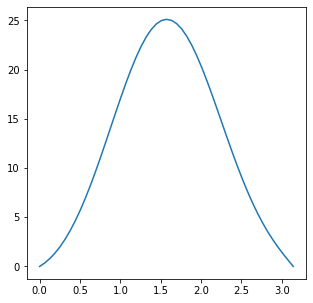

In [5]:
fig = plt.figure(figsize=(5,5))
plt.plot(theta_half, P[0, :])

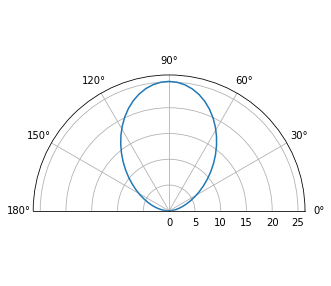

In [6]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
c = ax.plot(theta_half, P[0, :])
ax.set_thetamin(0)
ax.set_thetamax(180)
plt.show()

In [7]:
# create mesh for plot 
theta_r, phi_r = np.meshgrid(theta_half, phi)
#print(theta_r.shape)

In [8]:
# convert r, theta, phi to cartisian x, y, z
x = P * np.sin(theta_r) * np.cos(phi_r)
y = P * np.sin(theta_r) * np.sin(phi_r)
z = P * np.cos(theta_r)

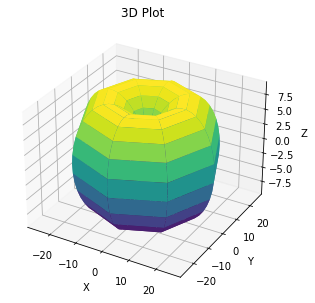

In [9]:
# Create the 3D plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot')

# Show the plot
plt.show()